# Problems with root logger

If we are not defining our own logger, then by default **root logger** will be considered. 

Once we perform basic configuration to the root logger then the **configurations are fixed and we cannot change**. 

**student.py**
```
import logging
logging.basicConfig(filename='student.log',level=logging.INFO)
logging.info('info message from student module')
```

**test.py**
```
import logging
import student     # student module set the root logger configuration.
logging.basicConfig(filename='test.log',level=logging.DEBUG)
logging.debug('debug message from test module')
```

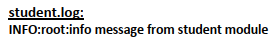

In the above application, the **configurations performed in the test module won't be reflected**, because the **root logger is already configured** in the student module.

# Need of customized logger

The problems with the root logger are:
* Once we set the basic configuration then that configuration is final and we cannot change.
* It will always work for only one handler at a time, either console or file, but not both simultaneously.
* It is not possible to configure a logger with different configurations at different levels.
* We cannot specify multiple log files for multiple **modules/classes/methods**.

**To overcome these problems we should go for our own customized loggers.**

# Advanced logging module features: Logger

Logger is more advanced than basic logging.

It is highly recommended to use and it provides several extra features.

To implement a customized logger three objects are:
* Logger object
* Handler Object
* Formatter object

# Steps for advanced logging

## Creation of Logger object and set log level

```
logger = logging.getLogger('demologger')
logger.setLevel(logging.INFO)
```

Default logging levels:
* Root logger → **WARNING**
* Custom logger → **NOT SET**

## Creation of Handler object and set log level

There are several types of Handlers like **StreamHandler**, **FileHandler**, etc.

```
# CONSOLE LOGGING
consoleHandler = logging.StreamHandler()
consoleHandler.setLevel(logging.INFO)
# FILE LOGGING
fileHandler = logging.FileHandler('abc.log', mode='w')
fileHandler.setLevel(logging.INFO)
```

> ***Note:** If we use **StreamHandler** then log messages will be printed to console*

## Creation of a Formatter object

```
formatter = logging.Formatter(
  format='%(asctime)s - %(name)s - %(levelname)s: %(message)s',
  datefmt='%d/%m/%Y %I:%M:%S %p'
)
```

## Add Formatter to Handler

```
consoleHandler.setFormatter(formatter)
fileHandler.setFormatter(formatter)
```

## Add Handler to Logger

```
logger.addHandler(consoleHandler)
logger.addHandler(fileHandler)
```

## Write messages by using the logger object and the following methods

```
logger.debug('debug message')
logger.info('info message')
logger.warn('warn message')
logger.error('error message')
logger.critical('critical message')
```

> ***Note:** By default, logger will set to WARNING level. But we can set our own level based on our requirement.*

```
logger = logging.getLogger('demologger')
logger.setLevel(logging.INFO)
```

The logger log level by default available to console and file handlers. 

If we are not satisfied with the logger level, then we can set the log level explicitly at the console level and file levels.

```
consoleHandler = logging.StreamHandler()
consoleHandler.setLevel(logging.WARNING)

fileHandler=logging.FileHandler('abc.log',mode='a')
fileHandler.setLevel(logging.ERROR)
```

> * The console and file log levels should be supported by the logger. 
> * That is, logger log level should be lower than console and file levels. 
> * Otherwise, only logger log level will be considered.

**Example**
* `logger` → **DEBUG** console → **INFO** → Valid and INFO will be considered.
* `logger` → **INFO** console → **DEBUG** → Invalid and only INFO will be considered to the console.

# Demo program to define & use Console Handler

In [1]:
import logging
logger=logging.getLogger('demologger')
logger.setLevel(logging.DEBUG)

consoleHandler = logging.StreamHandler()

formatter=logging.Formatter(
'%(asctime)s:%(levelname)s:%(name)s:%(message)s',
datefmt='%d/%m/%Y %I:%M:%S %p'
)

consoleHandler.setFormatter(formatter)
logger.addHandler(consoleHandler)

logger.critical('It is critical message')
logger.error('It is error message')
logger.warning('It is warning message')
logger.info('It is info message')
logger.debug('It is debug message')

13/12/2024 08:10:12 PM:CRITICAL:demologger:It is critical message
13/12/2024 08:10:12 PM:ERROR:demologger:It is error message
13/12/2024 08:10:12 PM:WARNING:demologger:It is warning message
13/12/2024 08:10:12 PM:INFO:demologger:It is info message
13/12/2024 08:10:12 PM:DEBUG:demologger:It is debug message


# Demo program to define & use File Handler

```
import logging
logger=logging.getLogger('demologger')
logger.setLevel(logging.DEBUG)

fileHandler=logging.FileHandler('custtest.log',mode='w')

formatter=logging.Formatter(
'%(asctime)s:%(levelname)s:%(name)s:%(message)s',
datefmt='%d/%m/%Y %I:%M:%S %p'
)

fileHandler.setFormatter(formatter)
logger.addHandler(fileHandler)

logger.critical('It is critical message')
logger.error('It is error message')
logger.warning('It is warning message')
logger.info('It is info message')
logger.debug('It is debug message')
```

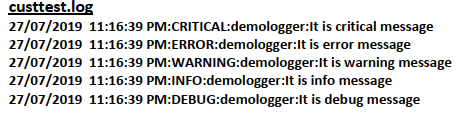

# Demo program to define and use both Console & File Handler

```
import logging
logger=logging.getLogger('demo logger')
logger.setLevel(logging.INFO)

consoleHandler = logging.StreamHandler()
fileHandler=logging.FileHandler('abc.log',mode='w')

formatter=logging.Formatter(
'%(asctime)s:%(levelname)s:%(name)s:%(message)s',
datefmt='%d/%m/%Y %I:%M:%S %p'
)

consoleHandler.setFormatter(formatter)
fileHandler.setFormatter(formatter)

logger.addHandler(consoleHandler)
logger.addHandler(fileHandler)

logger.critical('It is critical message')
logger.error('It is error message')
logger.warning('It is warning message')
logger.info('It is info message')
logger.debug('It is debug message')
```

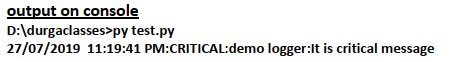

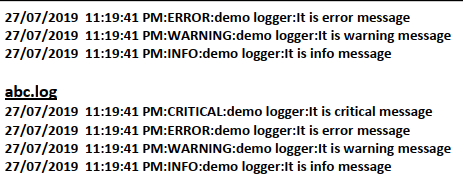

# Define and use a custom logger with different modules and with different log files

**student.py**

```
import logging
logger=logging.getLogger('studentlogger')
logger.setLevel(logging.DEBUG)

fileHandler=logging.FileHandler('student.log',mode='a')
fileHandler.setLevel(logging.ERROR)

formatter=logging.Formatter(
'%(asctime)s:%(levelname)s:%(name)s:%(message)s',
datefmt='%d/%m/%Y %H:%M:%S'
)

fileHandler.setFormatter(formatter)
logger.addHandler(fileHandler)

logger.critical('critical message from student module')
logger.error('error message from student module')
logger.warning('warning message student test module')
logger.info('info message from student module')
logger.debug('debug message from student module')
```


**test.py**

```
import logging
import student
logger=logging.getLogger('testlogger')
logger.setLevel(logging.DEBUG)

fileHandler=logging.FileHandler('test.log',mode='a')

formatter=logging.Formatter(
'%(asctime)s:%(levelname)s:%(name)s:%(message)s',
datefmt='%d/%m/%Y %I:%M:%S %p'
)

fileHandler.setFormatter(formatter)
logger.addHandler(fileHandler)

logger.critical('critical message from test module')
logger.error('error message from test module')
logger.warning('warning message from test module')
logger.info('info message from test module')
logger.debug('debug message from test module')
```

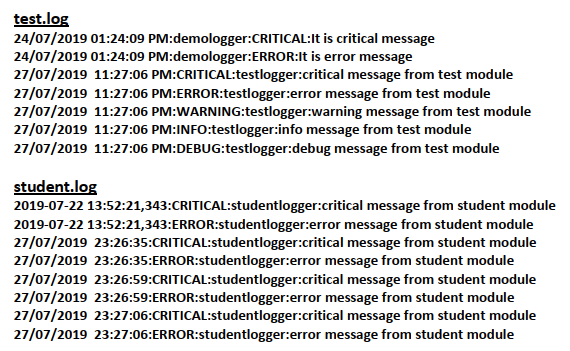

> ***Note:** In the above program, we are maintaining different log files for different modules, which is not possible with a root logger.*